In [3]:
import time
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

import astropy.units as u
from astropy import stats
from astropy.io import fits
from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector
from mmtwfs.telescope import MMT
import poppy

In [2]:
%load_ext autoreload
%autoreload 2

In [64]:
t = MMT()
foc_fact = t.secondary.focus_trans
pixscale = 0.15
fov = pixscale*150.
osys = poppy.OpticalSystem()
osys.add_pupil(t.pupil)

In [65]:
wavelength = 550. * u.nm
w = wavelength.to(u.m).value
defoc = 1000. * u.um * foc_fact
zv = ZernikeVector(Z04=defoc)
if zv.modestart != 1:
    zv.modestart = 1
    zv['Z01'] = 0.0
zv.units = u.m
coeffs = zv.norm_array
wfe = poppy.ZernikeWFE(radius=t.radius.to(u.m).value, coefficients=coeffs)
osys.add_pupil(wfe)
osys.add_detector(pixelscale=pixscale, fov_arcsec=fov)

In [66]:
psf = osys.calc_psf(w)

<IPython.core.display.Javascript object>


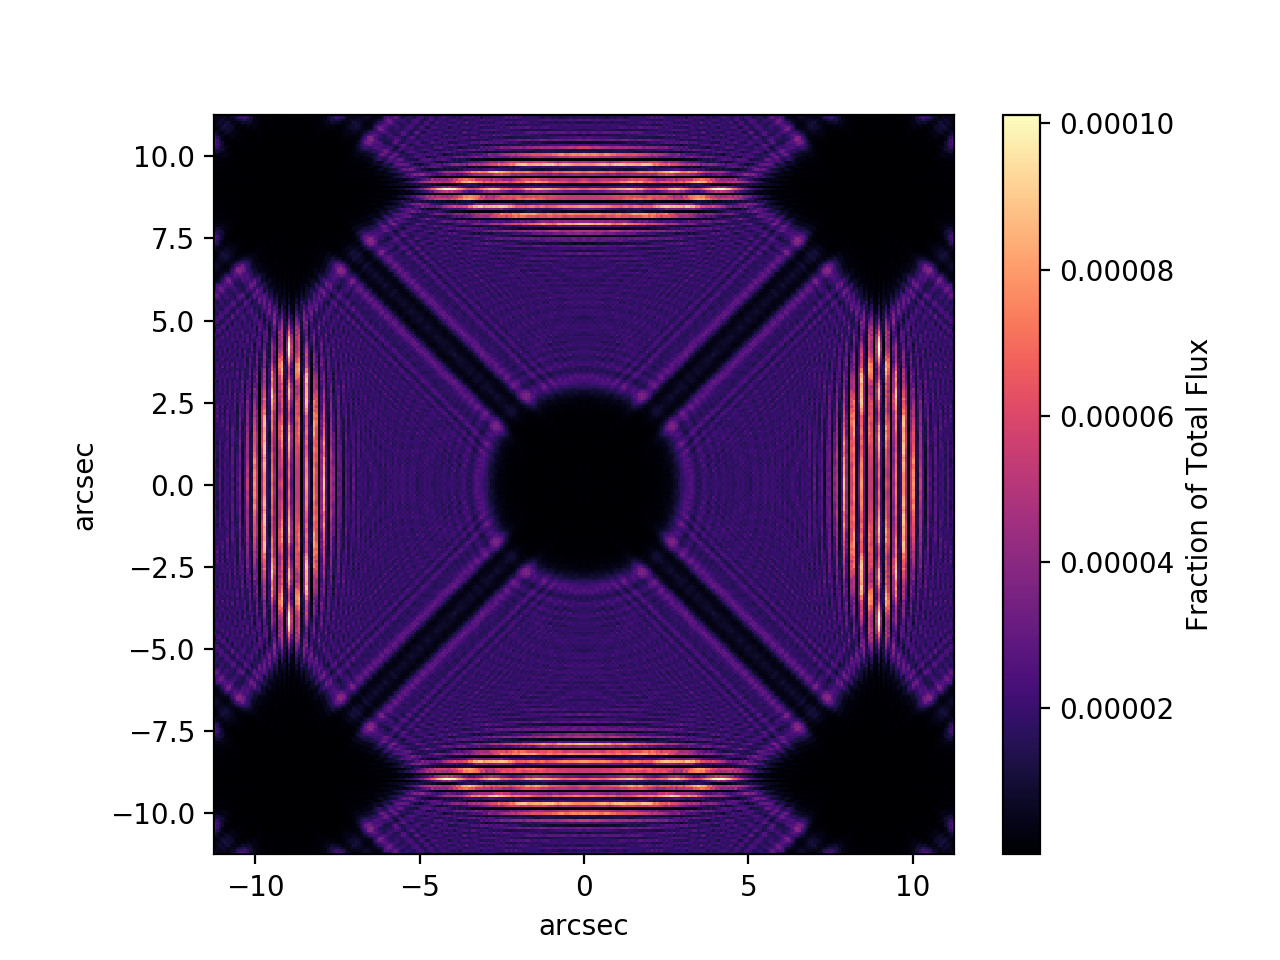

In [67]:
im = psf[0].data
psf_fig, ax = plt.subplots()
psf_fig.set_label("PSF at {0:0.0f}".format(wavelength))
norm = visualization.mpl_normalize.ImageNormalize(stretch=visualization.LinearStretch())
ims = ax.imshow(psf[0].data, extent=[-fov/2, fov/2, -fov/2, fov/2], cmap=cm.magma, norm=norm)
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
cb = psf_fig.colorbar(ims)
cb.set_label("Fraction of Total Flux")
psf_fig.show()

In [69]:
t.secondary.diameter / t.diameter

<Quantity 0.2595964566929134>

In [70]:
t.diameter * 5.29

<Quantity 34397.695999999996 mm>